In [11]:
import sys
sys.path.append("..")  # <-  This should point to the root directory of the project relative to this file

from scripts import database

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
sample_number = 1000

In [4]:
flights_query =  f"""
                SELECT * FROM flights ORDER BY RANDOM() LIMIT '{sample_number}';
                """

flights = database.query(flights_query)

In [6]:
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-01-10,UA,UA_CODESHARE,UA,5695,OO,N143SY,5695,14771,SFO,...,1499.0,0.0,0.0,9.0,0.0,11.0,None,NaN,NaN,None
1,2019-06-22,WN,WN,WN,4561,WN,N763SW,4561,14771,SFO,...,337.0,0.0,0.0,29.0,0.0,0.0,None,NaN,NaN,None
2,2019-06-26,F9,F9,F9,631,F9,N341FR,631,11292,DEN,...,349.0,72.0,0.0,0.0,0.0,59.0,1810.0,25.0,25.0,None
3,2018-08-03,G4,G4,G4,1713,G4,224NV,1713,11996,GSP,...,620.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2019-10-30,WN,WN,WN,2315,WN,N7827A,2315,13796,OAK,...,588.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [19]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [95]:
DelayDate = flights[["fl_date","dep_delay","dep_time","taxi_out","nas_delay"]]

In [96]:
DelayDate.isnull().any()

fl_date      False
dep_delay     True
dep_time      True
taxi_out      True
nas_delay     True
dtype: bool

In [97]:
DelayDate = DelayDate.assign(hour = DelayDate['dep_time']//100)

In [98]:
DelayDate.head()

,fl_date,dep_delay,dep_time,taxi_out,nas_delay,hour
0,2019-01-10,11.0,1754.0,28.0,9.0,17.0
1,2019-06-22,-3.0,902.0,62.0,29.0,9.0
2,2019-06-26,135.0,1911.0,21.0,0.0,19.0
3,2018-08-03,13.0,848.0,7.0,NaN,8.0
4,2019-10-30,-4.0,2151.0,12.0,NaN,21.0


In [99]:
DelayDate = DelayDate.dropna(subset=['dep_time'])
DelayDate  = DelayDate.fillna(0)

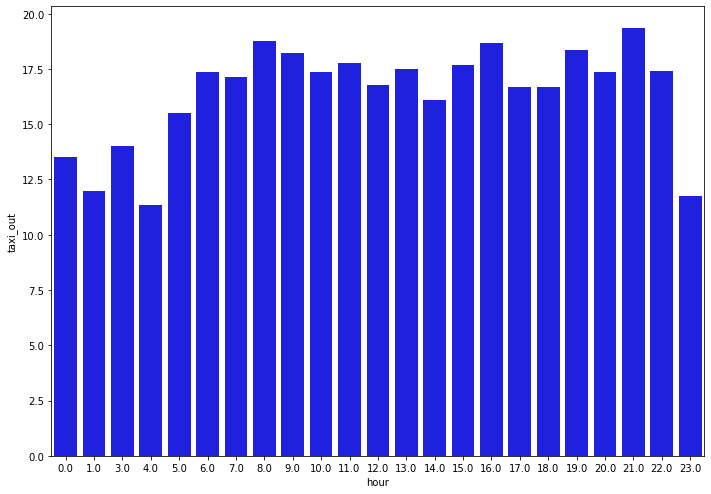

In [106]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
DelayHour = DelayDate.groupby(by='hour').mean().reset_index()
sns.barplot(x=DelayHour.hour, y= DelayMonth.taxi_out, color ='blue')
plt.show()

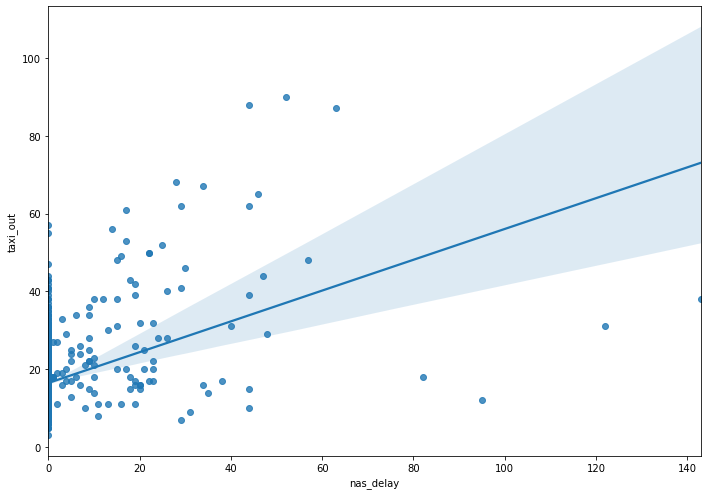

In [107]:
rcParams['figure.figsize'] = 11.7,8.27
sns.regplot(x="nas_delay", y="taxi_out", data=DelayDate)
plt.show()

In [1]:
# I don't see a correlation